## Ejercicio Visualizacion

In [1]:
import pandas as pd

from tabulate import tabulate

In [2]:
sales = pd.read_csv(r'https://raw.githubusercontent.com/ricardoahumada/DataScienceBasics/refs/heads/main/data/company_sales/sales.csv')
sales

,0,0.1,0000-00-00,0000-00-00.1,0000-00-00.2,0.2,0.3,productCode,status,comments,0.4,0.00,0.00.1,origin
0,10100,1,0000-00-00,0000-00-00,0000-00-00,363,1216,S24_3969,Shipped,NaN,49,35.29,1729.21,spain
1,10100,2,0000-00-00,0000-00-00,0000-00-00,363,1216,S18_2248,Shipped,NaN,50,55.09,2754.50,spain
2,10100,3,0000-00-00,0000-00-00,0000-00-00,363,1216,S18_1749,Shipped,NaN,30,136.00,4080.00,spain
3,10100,4,0000-00-00,0000-00-00,0000-00-00,363,1216,S18_4409,Shipped,NaN,22,75.46,1660.12,spain
4,10101,1,0000-00-00,0000-00-00,0000-00-00,128,1504,S18_2795,Shipped,Check on availability.,26,167.06,4343.56,spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,10425,9,0000-00-00,NaN,0000-00-00,119,1370,S24_2300,In Process,NaN,49,127.79,6261.71,spain
2997,10425,10,0000-00-00,NaN,0000-00-00,119,1370,S18_2432,In Process,NaN,19,48.62,923.78,spain
2998,10425,11,0000-00-00,NaN,0000-00-00,119,1370,S32_1268,In Process,NaN,41,83.79,3435.39,spain
2999,10425,12,0000-00-00,NaN,0000-00-00,119,1370,S10_4962,In Process,NaN,38,131.49,4996.62,spain


In [3]:
sales_columns = {
    '0': 'orderNumber',
    '0.1': 'orderLineNumber',
    '0000-00-00': 'orderDate',
    '0000-00-00.1': 'shippedDate',
    '0000-00-00.2': 'requiredDate',
    '0.2': 'customerNumber',
    '0.3': 'employeeNumber',
    'productCode': 'productCode',
    'status': 'status',
    'comments': 'comments',
    '0.4': 'quantityOrdered',
    '0.00': 'priceEach',
    '0.00.1': 'sales_amount',
    'origin': 'origin'}

# Renombrar las columnas del DataFrame
sales.rename(columns=sales_columns, inplace=True)

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderNumber      3001 non-null   int64  
 1   orderLineNumber  3001 non-null   int64  
 2   orderDate        3001 non-null   object 
 3   shippedDate      2859 non-null   object 
 4   requiredDate     3001 non-null   object 
 5   customerNumber   3001 non-null   int64  
 6   employeeNumber   3001 non-null   int64  
 7   productCode      3001 non-null   object 
 8   status           3001 non-null   object 
 9   comments         759 non-null    object 
 10  quantityOrdered  3001 non-null   int64  
 11  priceEach        3001 non-null   float64
 12  sales_amount     3001 non-null   float64
 13  origin           3001 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 328.4+ KB


Crear gráficos de Barras, Scatter, Histogramas, Cajas

In [4]:
sales['status'].unique()

array(['Shipped', 'Resolved', 'Cancelled', 'On Hold', 'Disputed',
       'In Process'], dtype=object)

In [5]:

import matplotlib.pyplot as plt

In [6]:
status_cats = sales.groupby('status').agg(num=('status','count'))
print(status_cats)


             num
status          
Cancelled     79
Disputed      14
In Process    42
On Hold       44
Resolved      47
Shipped     2775


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Conteo de status')

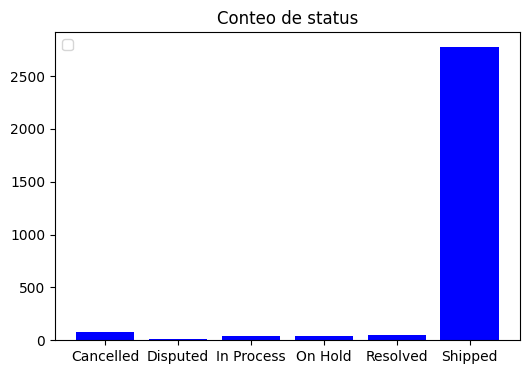

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(status_cats.index, status_cats['num'], color='blue')
ax.legend(loc='upper left')
ax.set_title('Conteo de status')




<AxesSubplot: ylabel='num'>

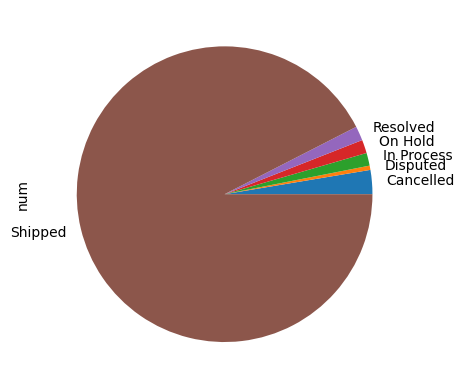

In [8]:
status_cats.plot(y='num', kind='pie', legend=False)

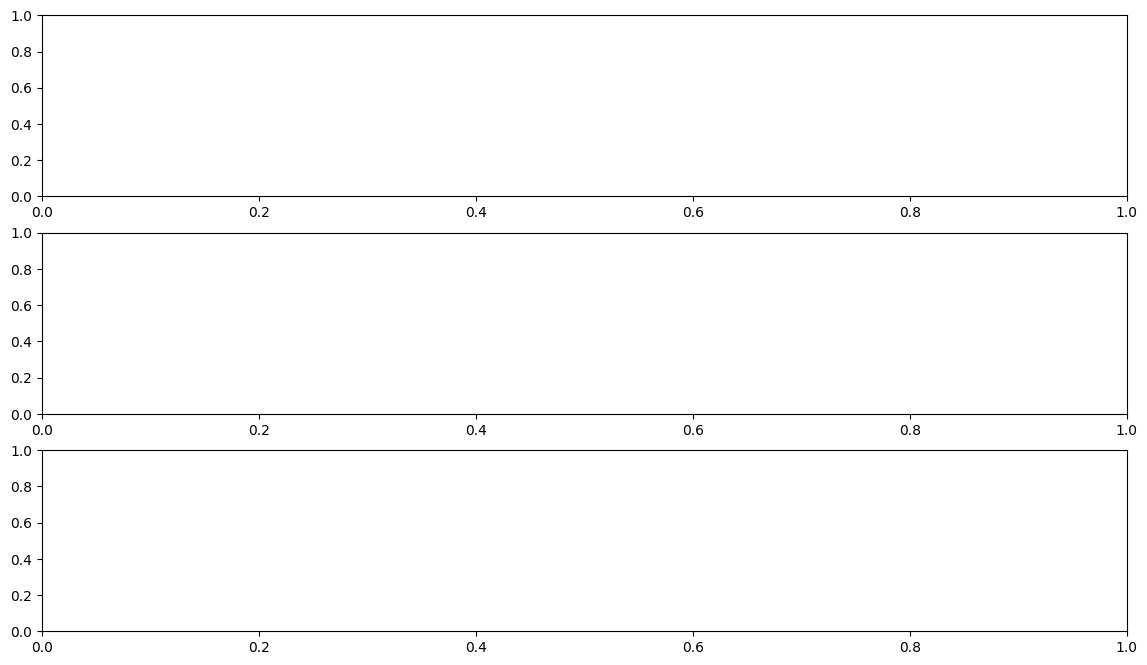

In [9]:
#scatter

variables = ['quantityOrderes','priceEach','sales_amount']

fig =plt.figure(figsize = (14,8))

for i in range(0,3):
    fig.add_subplot(3, 1, i+1)

In [10]:
#histogramas
quantityOrdered = sales('quantityOredered')

fig, ax = plt.subplots(figsize = (10,4))
...

TypeError: 'DataFrame' object is not callable

<AxesSubplot: >

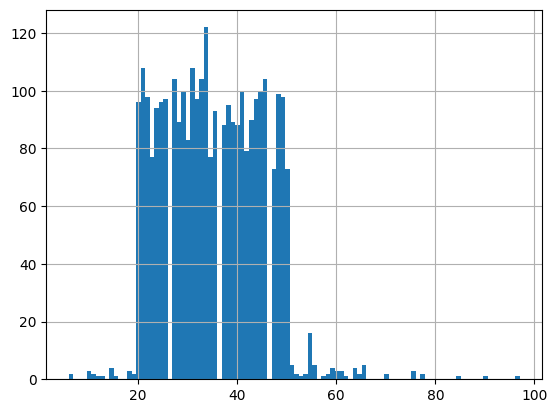

In [12]:
sales['quantityOrdered'].hist(bins=100)

<AxesSubplot: >

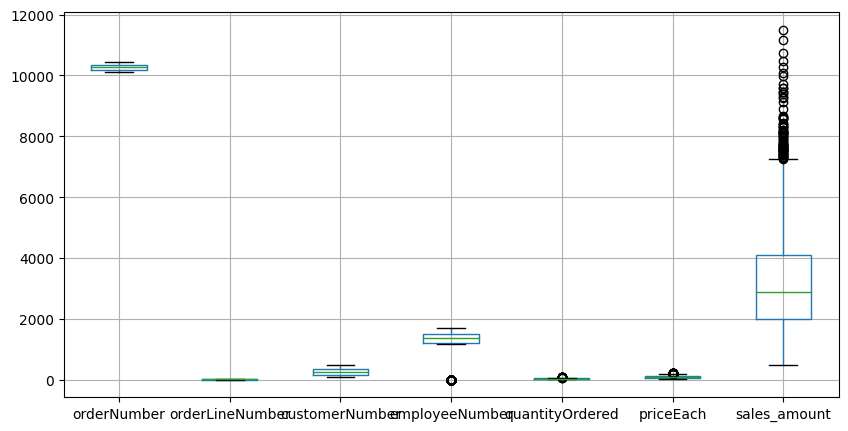

In [17]:
#boxplot: para identificar outliers

sales.boxplot(return_type = 'axes', figsize =(20,10))

<AxesSubplot: >

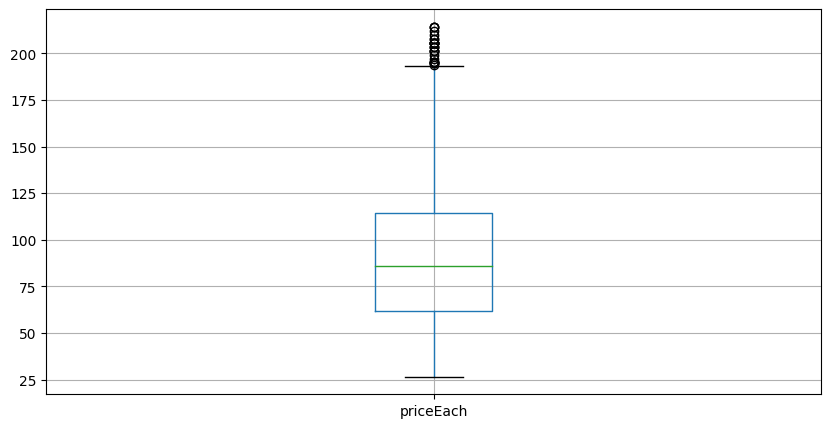

In [18]:

sales[['priceEach']].boxplot(return_type = 'axes', figsize =(10,5))

In [20]:
#heatmaps

sales_corr = sales.corr('pearson')
sales_corr.style.background_gradient(cmap='Blues')

ValueError: could not convert string to float: '0000-00-00'